<a href="https://colab.research.google.com/github/JackBenadon/DS340W_Group22/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

In [209]:
df = pd.read_csv('CardiacPrediction.csv')
df

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,93691,1,25,10,1.59,92,112,76,39.2,136.5,...,4.14,1.27,5.8,2,2,1,2,1,2,0
37075,93695,2,76,4,1.43,78,112,46,59.1,165.8,...,3.62,1.76,5.6,2,2,1,2,2,2,0
37076,93697,2,80,7,2.97,74,146,58,71.7,152.2,...,6.62,2.90,5.7,2,2,1,2,2,2,0
37077,93700,1,35,1,0.00,76,106,66,78.2,173.3,...,3.72,1.09,5.2,2,2,1,2,2,1,0


## Exploratory Data Analysis

In [210]:
#Removes unimportant variables as shown in Research Paper 2
df.drop(['SEQN','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)

In [211]:
#All Columns in the dataset
df.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'White-Blood-Cells', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Red-Cell-Distribution-Width', 'Albumin', 'ALP', 'AST', 'ALT',
       'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH',
       'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides',
       'HDL', 'Glycohemoglobin', 'Vigorous-work', 'Moderate-work', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [212]:
heartDiseaseCount = (df['CoronaryHeartDisease'] == 1).sum()
noHeartDiseaseCount = (df['CoronaryHeartDisease'] == 0).sum()
print(f'People with heart disease: {heartDiseaseCount} \nPeople without heart disease: {noHeartDiseaseCount}')

People with heart disease: 1508 
People without heart disease: 35571


In [213]:
#importing packages for vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'CardiacPrediction.csv', 'drive', 'sample_data']


In [214]:
print(df.corr()["CoronaryHeartDisease"].sort_values(ascending=False))

CoronaryHeartDisease           1.000000
Age                            0.222649
Creatinine                     0.114318
Glycohemoglobin                0.101517
Uric.Acid                      0.098907
Glucose                        0.086754
Systolic                       0.080224
Red-Cell-Distribution-Width    0.074316
LDH                            0.072073
Vigorous-work                  0.054506
Triglycerides                  0.034160
Bilirubin                      0.030407
Weight                         0.029003
ALP                            0.028672
Moderate-work                  0.022683
Body-Mass-Index                0.022211
GGT                            0.014732
White-Blood-Cells              0.011565
Mean-Platelet-Vol              0.008768
AST                            0.008149
Basophils                     -0.000105
ALT                           -0.004512
Mean-cell-Hemoglobin          -0.014665
Hemoglobin                    -0.015201
Iron                          -0.018252


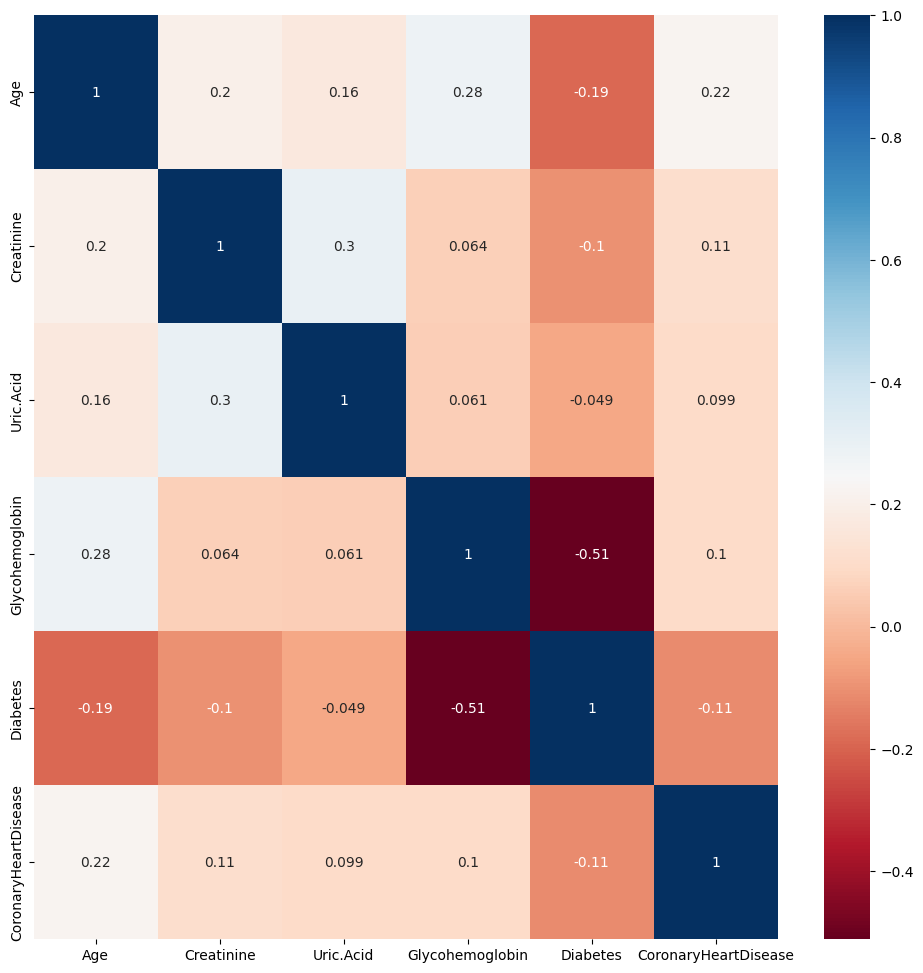

In [215]:
#find correlation matrix
corr_mat=df.corr()
#Select variables have more than 0.09 or less than -0.09 correlation with the target variable(CoronaryHeartDisease)
chosen_variable=corr_mat[abs(corr_mat["CoronaryHeartDisease"])>0.09].index
#plot the heatmap
plt.figure(figsize=(12,12))
ax = sns.heatmap(df[chosen_variable].corr(),annot=True,cmap='RdBu')

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64


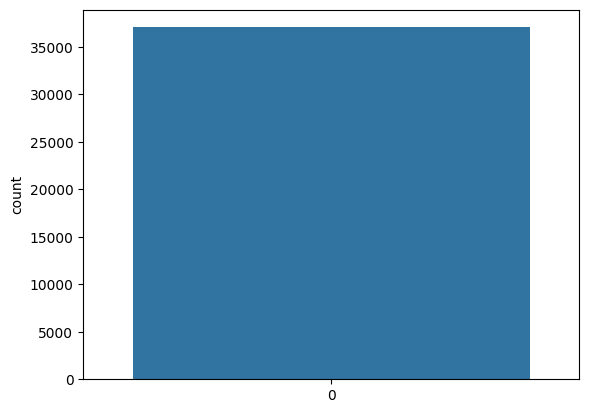

In [216]:
#Analysing the target variable
y = df["CoronaryHeartDisease"]

sns.countplot(y)

target_temp = df.CoronaryHeartDisease.value_counts()

print(target_temp)

<Axes: xlabel='Gender', ylabel='CoronaryHeartDisease'>

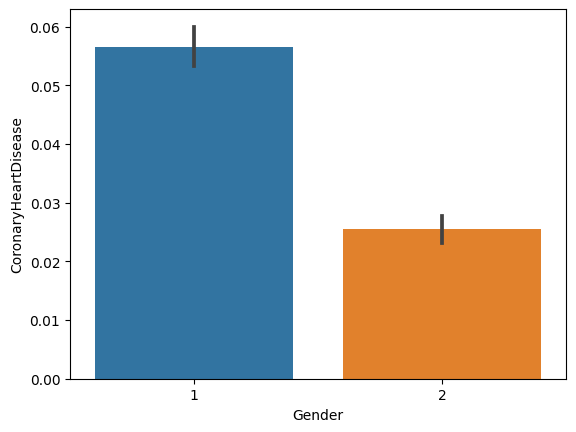

In [217]:
# analyzing gender in the dataset
df["Gender"].unique()

# 1 = Male
# 2 = Female
sns.barplot(x=df["Gender"], y=y)

In [218]:
#number of men and women
GenderIs1 = (df['Gender'] == 1).sum()
GenderIs2 = (df['Gender'] == 0).sum()
print(f'People with gender == 1: {heartDiseaseCount} \nPeople with gender == 2: {noHeartDiseaseCount}')

People with gender == 1: 1508 
People with gender == 2: 35571


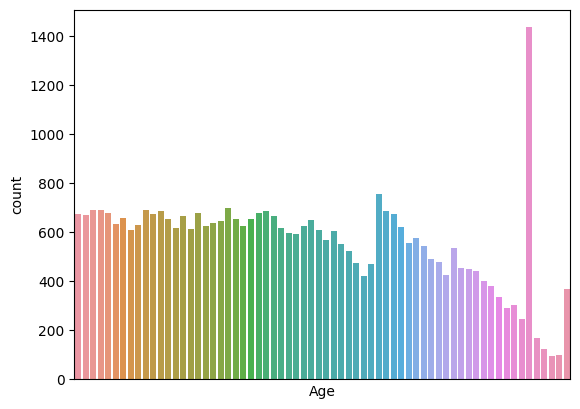

In [219]:
# Analyzing the age feature
df["Age"].unique()

# how many there are in the dataset
sns.countplot(x=df["Age"])
plt.xticks([])  # This line removes the x-axis tick labels
plt.show()

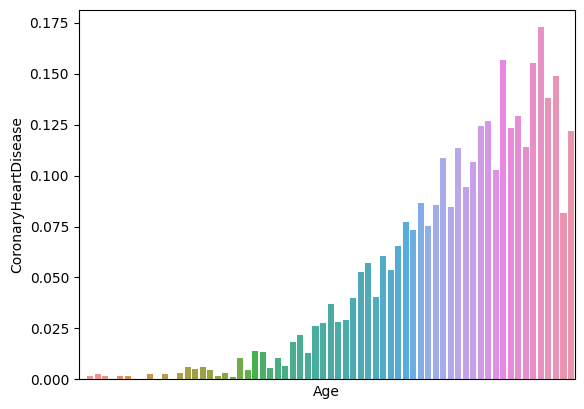

In [220]:
# the percentage who have heart disease
sns.barplot(x=df["Age"],y=y, errorbar=None)
plt.xticks([])
plt.show()

<Axes: xlabel='Diabetes', ylabel='CoronaryHeartDisease'>

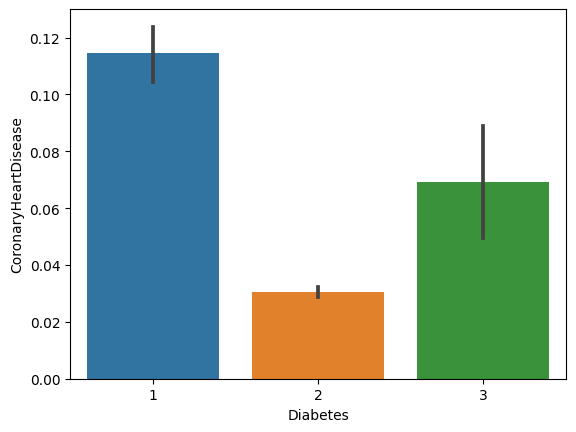

In [221]:
# The margin of error for some of the older ages is larger because of the small sample size, but the error bars hurt the understandability of the graph so I had to remove them.
# analyzing the diabetes feature
df["Diabetes"].unique()

sns.barplot(x=df["Diabetes"],y=y)

<Axes: xlabel='Creatinine', ylabel='Density'>

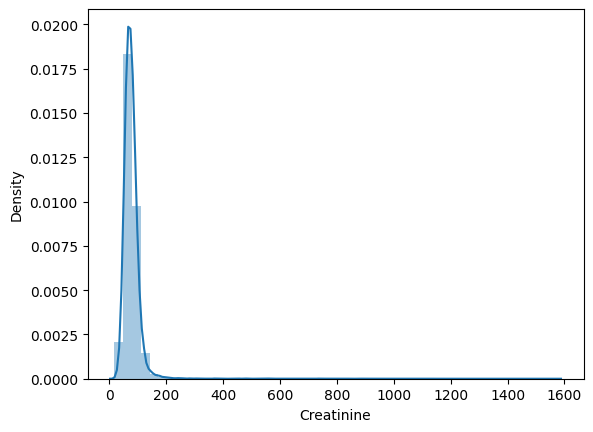

In [222]:
# explorting the density of the creatinine feature
sns.distplot(df['Creatinine'])

<Axes: xlabel='Glycohemoglobin', ylabel='Density'>

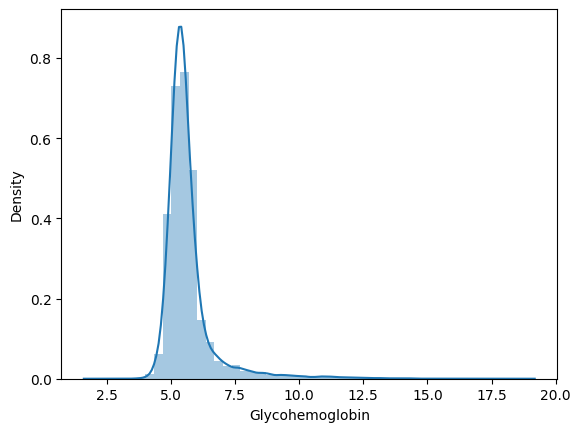

In [223]:
#exploring the density of the Glycohemoglobin feature
sns.distplot(df['Glycohemoglobin'])

<Axes: xlabel='Cholesterol', ylabel='Density'>

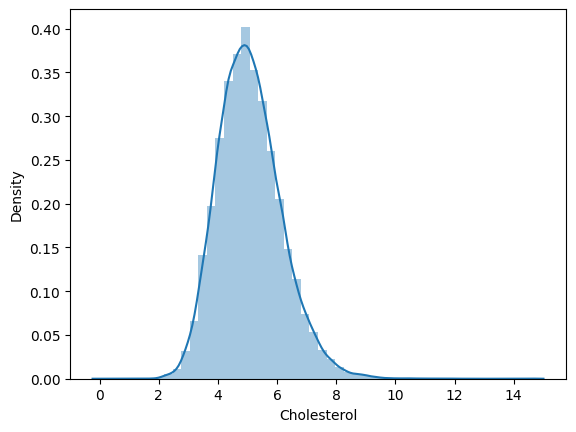

In [224]:
# exploring the density of the cholesterol feature
sns.distplot(df['Cholesterol'])

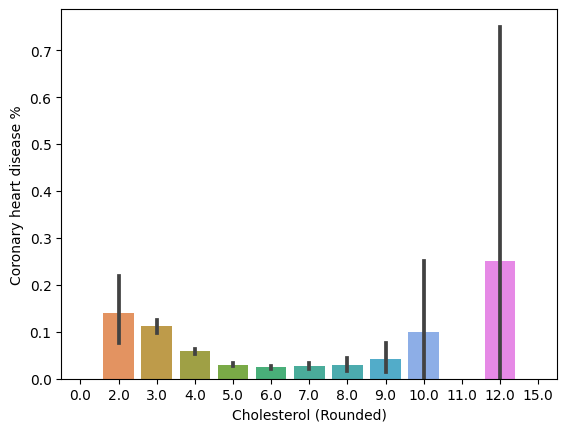

In [225]:
df["Cholesterol_Rounded"] = df["Cholesterol"].round()

# Create the bar plot
sns.barplot(x=df["Cholesterol_Rounded"], y=y)

# Set plot labels and title
plt.xlabel("Cholesterol (Rounded)")
plt.ylabel("Coronary heart disease %")

# Show the plot
plt.show()

## Balancing the Imbalanced Data

In [226]:
X = df.drop('CoronaryHeartDisease', axis=1)
y = df['CoronaryHeartDisease']

# undersampling the data
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X, y)


## LASSO for Feature Selection

In [227]:
# split into training and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)

Training set shapes: (2111, 37) (2111,)
Testing set shapes: (452, 37) (452,)
Validation set shapes: (453, 37) (453,)


In [228]:
#Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [229]:
# create the lasso model
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

lasso_cv.fit(X_train, y_train)

print('The optimal alpha is', lasso_cv.alpha_)

# finding the predicted probability
y_pred_proba = lasso_cv.predict(X_test)
# converting to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)   # might need to lower threshold
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The optimal alpha is 0.01
Accuracy: 0.8163716814159292


In [230]:
#Feature selection in Lasso
col_names = list(X.columns)
selected_features = [col_names[i] for i in range(len(col_names)) if lasso_cv.coef_[i] != 0]

lassoCoef = pd.Series(lasso_cv.coef_, index=X.columns)
print(f'The selected features are \n{lassoCoef[lassoCoef != 0]}')

The selected features are 
Gender                        -0.037164
Age                            0.241103
Diastolic                     -0.005067
White-Blood-Cells              0.003726
Platelet-count                -0.013635
Red-Cell-Distribution-Width    0.024254
Cholesterol                   -0.053571
Creatinine                     0.000865
GGT                            0.001603
LDH                            0.019683
Uric.Acid                      0.017430
Triglycerides                  0.026228
HDL                           -0.020147
Glycohemoglobin                0.008241
Moderate-work                 -0.001304
Diabetes                      -0.025860
Blood-Rel-Diabetes            -0.005777
Blood-Rel-Stroke              -0.041697
dtype: float64


## Machine Learning Experiments

In [231]:
df_reduced = df[["CoronaryHeartDisease"] + selected_features]

df_reduced

,CoronaryHeartDisease,Gender,Age,Diastolic,White-Blood-Cells,Platelet-count,Red-Cell-Distribution-Width,Cholesterol,Creatinine,GGT,LDH,Uric.Acid,Triglycerides,HDL,Glycohemoglobin,Moderate-work,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke
0,0,1,77,56,7.6,214.0,13.7,5.250,61.90,20,140,362.8,1.298,1.39,4.7,3,2,2,2
1,0,1,49,83,5.9,209.0,13.1,7.160,70.70,34,133,404.5,3.850,1.08,5.5,1,2,2,2
2,0,1,37,99,10.2,357.0,13.6,3.900,88.40,32,131,339.0,1.581,0.98,5.2,1,2,1,1
3,0,1,70,66,11.6,228.0,14.4,7.940,61.90,24,181,410.4,3.635,1.28,7.6,3,1,1,2
4,0,1,81,61,9.1,160.0,12.4,4.420,88.40,24,150,368.8,0.756,1.04,5.8,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,0,1,25,76,7.1,253.0,13.3,4.189,56.58,26,144,428.3,1.264,1.27,5.8,2,2,1,2
37075,0,2,76,46,6.4,135.0,13.6,3.646,97.24,16,124,368.8,0.948,1.76,5.6,2,2,2,2
37076,0,2,80,58,4.7,172.0,16.9,6.801,81.33,16,120,273.6,1.095,2.90,5.7,2,2,2,2
37077,0,1,35,66,7.6,194.0,13.0,3.672,82.21,64,136,237.9,0.937,1.09,5.2,2,2,2,1


In [232]:
X = df_reduced.drop('CoronaryHeartDisease', axis=1)
y = df_reduced['CoronaryHeartDisease']

# undersampling the data
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

# split into training and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)

Training set shapes: (2111, 18) (2111,)
Testing set shapes: (452, 18) (452,)
Validation set shapes: (453, 18) (453,)


In [233]:
#Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [234]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

### Logistic Regression

In [235]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.8163716814159292
Precision: 0.8125
Recall: 0.8369098712446352
F1-Score: 0.8245243128964059


##### Validation

In [236]:
y_pred = lr.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8278145695364238
Precision: 0.8204081632653061
Recall: 0.8553191489361702
F1-Score: 0.8375


In [237]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Naive Bayes

In [238]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7632743362831859
Precision: 0.828125
Recall: 0.6824034334763949
F1-Score: 0.748235294117647


##### Validation

In [239]:
y_pred = nb.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7373068432671082
Precision: 0.8186813186813187
Recall: 0.6340425531914894
F1-Score: 0.7146282973621104


In [240]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### SVM

In [241]:
sv = SVC(C=5, degree=1, gamma=0.001, kernel='poly')

sv.fit(X_train, y_train)

y_pred = sv.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.8097345132743363
Precision: 0.7928286852589641
Recall: 0.8540772532188842
F1-Score: 0.8223140495867769


##### Validation

In [242]:
y_pred = sv.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8322295805739515
Precision: 0.8117647058823529
Recall: 0.8808510638297873
F1-Score: 0.8448979591836735


In [243]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### K-Nearest Neighbors

In [244]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7876106194690266
Precision: 0.7939914163090128
Recall: 0.7939914163090128
F1-Score: 0.7939914163090128


##### Validation

In [245]:
y_pred = knn.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8057395143487859
Precision: 0.8237885462555066
Recall: 0.7957446808510639
F1-Score: 0.8095238095238094


In [246]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Random Forest

In [247]:
rf = RandomForestClassifier(n_estimators=1800, max_depth=20)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7964601769911505
Precision: 0.7680608365019012
Recall: 0.8669527896995708
F1-Score: 0.8145161290322581


##### Validation

In [248]:
y_pred = rf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8145695364238411
Precision: 0.7984189723320159
Recall: 0.8595744680851064
F1-Score: 0.8278688524590165


In [249]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### XGBoost

In [250]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=9)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7920353982300885
Precision: 0.7704280155642024
Recall: 0.8497854077253219
F1-Score: 0.8081632653061225


##### Validation

In [251]:
y_pred = xgb_model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7902869757174393
Precision: 0.7734375
Recall: 0.8425531914893617
F1-Score: 0.8065173116089612


In [252]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Baseline Model Metric Comparison

In [253]:
# create a table/chart with the metrics of all the models and figure out which performs the best
data = [accuracy_list, precision_list, recall_list, f1_list]

df_metrics = pd.DataFrame(data=data, columns=['Logistic Regression', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost'],
                          index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_metrics

,Logistic Regression,Naive Bayes,SVM,K-Nearest Neighbors,Random Forest,XGBoost
Accuracy,0.827815,0.737307,0.832230,0.805740,0.814570,0.790287
Precision,0.820408,0.818681,0.811765,0.823789,0.798419,0.773438
Recall,0.855319,0.634043,0.880851,0.795745,0.859574,0.842553
F1-Score,0.837500,0.714628,0.844898,0.809524,0.827869,0.806517


## Neural Network

In [254]:
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [255]:
class DQN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.layer2 = nn.Linear(32, 32)
        self.layer3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        return x

In [256]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32)

In [293]:
input_size = X.shape[1]
output_size = 1
learning_rate = 0.001

nnet = DQN(input_size, output_size)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(params=nnet.parameters(), lr=learning_rate)

In [294]:
epochs = 150

for epoch in range(epochs):
    ### Training
    nnet.train()

    y_logits = nnet(X_train_tensor).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train_tensor)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

In [297]:
# Testing
with torch.no_grad():
    # forward pass
    test_logits = nnet(X_test_tensor).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # calculate loss/accuracy
    test_loss = loss_fn(test_logits, y_test_tensor)

predictions_np = test_pred.numpy()
y_test_np = y_test_tensor.numpy()

accuracy = accuracy_score(y_test_np, predictions_np)
precision = precision_score(y_test_np, predictions_np)
recall = recall_score(y_test_np, predictions_np)
f1 = f1_score(y_test_np, predictions_np)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8097
Precision: 0.7860
Recall: 0.8670
F1-score: 0.8245


##### Validation

In [298]:
# Validation
with torch.no_grad():
    # forward pass
    valid_logits = nnet(X_valid_tensor).squeeze()
    valid_pred = torch.round(torch.sigmoid(valid_logits))
    # calculate loss/accuracy
    valid_loss = loss_fn(valid_logits, y_valid_tensor)

predictions_np = valid_pred.numpy()
y_valid_np = y_valid_tensor.numpy()

accuracy = accuracy_score(y_valid_np, predictions_np)
precision = precision_score(y_valid_np, predictions_np)
recall = recall_score(y_valid_np, predictions_np)
f1 = f1_score(y_valid_np, predictions_np)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8212
Precision: 0.7984
Recall: 0.8766
F1-score: 0.8357
